<a href="https://colab.research.google.com/github/SeohyunLee0321/GDSC/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_Chapter7_3_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EB%AA%A8%EB%8D%B8%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**손실 곡선**

fit() 메서드는 History 클래스 객체 반환

History 객체에는 훈련 과정에서 계산한 지표, 즉 손실과 정확도 값이 저장되어 있음

In [ ]:
# 패션 MNIST 데이터셋을 적재하고 훈련 세트와 검증 세트로 나누기
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
  keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state = 42
)

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# 모델 생성
# 모델을 만드는 함수 정의
def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28, 28)))
  model.add(keras.layers.Dense(100, activation = 'relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation = 'softmax'))
  return model

  # if 구문의 역할 : model_fn() 함수에 (a_layer 매개변수로) 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가하는 것

In [ ]:
model = model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit() 메서드의 결과를 history 변수에 담기
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)

# verbose = 0?
# verbose 매개변수는 훈련 과정 출력을 조절, 기본값은 1로 에포크마다 진행 막대와 함께 손실 등의 지표가 출력됨
# 2로 바꾸면 진행 막대를 빼고 출력

In [ ]:
# history 객체에는 훈련 측정값이 담겨 있는 history 딕셔너리가 들어있음
print(history.history.keys())

# 손실과 정확도가 포함되어있음
# compile() 메서드에서 metrics 매개변수에 'accuracy' 를 추가했기 때문에 history 안에 정확도도 포함되어 있는 것

dict_keys(['loss', 'accuracy'])


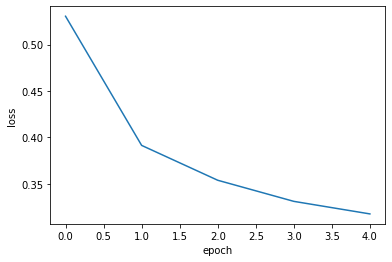

In [ ]:
# matplotlib을 사용해 손실과 정확도를 그래프로 그리기
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

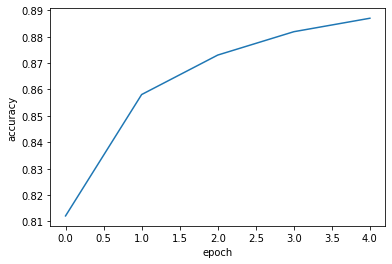

In [ ]:
# 정확도 출력
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

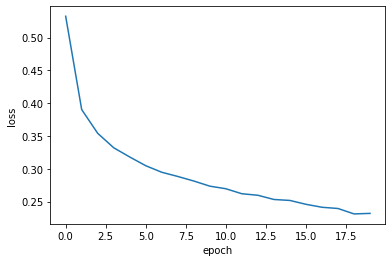

In [ ]:
# 손실이 감소하고 정확도가 향상하는 것을 알 수 있음
# 에포크를 늘려 훈련을 늘리기
# 손실 그래프 그리기
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0)

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

**검증 손실**

확률적 경사 하강법을 사용했을 때 과대/과소적합과 에포크 사이에는 관계가 있음

에포크에 따른 과대/과소적합을 파악하려면 훈련세트에 대한 점수뿐만 아니라 검증세트에 대한 점수도 필요

In [ ]:
# 에포크마다 검증 손실을 계산하기 위해 케라스 모델의 fit() 메서드에 검증 데이터를 전달
# validation_data 매개변수에 검증에 사용할 입력과 타깃값을 튜플로 만들어 전달
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data = (val_scaled, val_target))
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


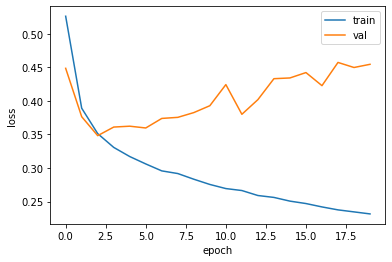

In [ ]:
# 검증 세트에 대한 손실을 val_loss에 들어있고, 정확도는 val_accuracy에 들어있음
# 과대/과소적합 문제를 조사하기 위해 훈련 손실과 검증 손실을 한 그래에 그려 비교
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 과대적합 모델이 만들어졌음

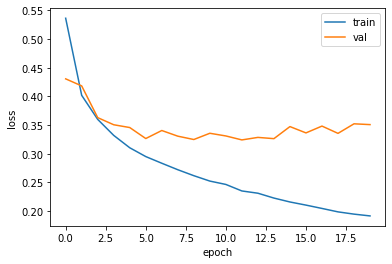

In [ ]:
# 기본 RMSprop 옵티마이저는 많은 문제에서 잘 작동
# 다른 옵티마이저 중 Adam 이 적응적 학습률을 사용하여 에포크가 진행되면서 학습률의 크기를 조정할 수 있음
model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data = (val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

**드롭아웃**

드롭아웃 : 훈련 과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서 (뉴런의 출력을 0으로 만들어) 과대적합을 막는 방법

-> 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런이 과대하게 의존하는 것을 줄일 수 있고, 모든 입력에 대해 주의를 기울여야 함

-> 일부 뉴런의 출력이 없을 수 있으면 더 안정적인 예측 가능

In [ ]:
# model_fn() 함수에 드롭아웃 객체를 전달하여 층을 추가
# 30% 정도 드롭아웃
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

# 은닉층 뒤에 추가된 드롭아웃 층은 훈련되는 모델 파라미터가 없음
# 입력과 출력의 크기가 같음
# 일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기는 바꾸지 않음

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


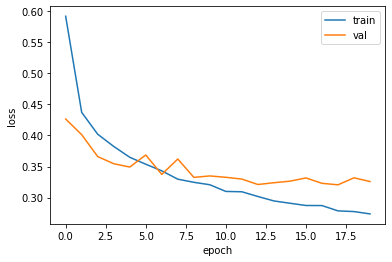

In [ ]:
# 훈련이 끝난 뒤에 평가나 예측을 수행할 때는 드롭아웃을 적용하면 안 됨
# 훈련된 모든 뉴런을 사용해야 올바른 예측 수행 가능
# 텐서플로우와 케라스는 모델을 평가와 예측에 사용할 때는 자동으로 드롭아웃을 적용하지 않음
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
                    validation_data = (val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 과대적합이 줄어든 것을 확인 가능
# 열 번째 에포크 정도에서 검증 손실의 감소가 멈추지만 크게 상승하지 않고 어느 정도 유지되는 것을 알 수 있음
# 20번의 에포크 동안 훈련하는 모델이기 때문에 결국 과대적합 되어 있음

In [ ]:
# 과대적합 되지 않은 모델을 얻기 위해 에포크 횟수를 10으로 줄이고 다시 훈련
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 10, verbose = 0,
                    validation_data = (val_scaled, val_target))

In [ ]:
# 케라스 모델은 훈련된 모델의 파라미터를 저장하는 save_weights() 메서드 제공
# 기본적으로 텐서플로우의 체크포인트 포맷으로 저장
# 파일의 확장자가 .h5일 경우 HDF5 포맷으로 저장
model.save_weights('model-weights.h5')

In [ ]:
# 모델 구조와 모델 파라미터를 함께 저장하는 save() 메서드 제공
# 기본적으로 텐서플로우의 SavedModel 포맷으로 저장
# 파일의 확장자가 .h5일 경우 HDF5 포맷으로 저장
model.save('model-whole.h5')

In [ ]:
# 파일이 잘 만들어졌는지 확인
!ls -al *.h5

# 셀 명령을 실행할 때 !를 사용

-rw-r--r-- 1 root root 333448 Jan 18 03:15 model-weights.h5
-rw-r--r-- 1 root root 982664 Jan 18 03:15 model-whole.h5


In [ ]:
# 훈련하지 않은 새로운 모델 만들고 model-weights.h5 파일에서 훈련된 모델 파라미터를 읽어서 사용
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

# 훈련하지 않은 새로운 모델을 만들고 이전에 저장했던 모델 파라미터 적재
# load_weights() 메서드를 사용하려면 save_weights() 메서드로 저장했던 모델과 정확히 같은 구조를 가져야 함
# model_fn() 함수를 사용해 동일한 모델을 만들어 사용했기 때문에 가능

In [ ]:
# 모델의 검증 정확도 확인
# 케라스에서 예측을 수행하는 predict() 메서드는 사이킷런과 다르게 10개의 클래스에 대한 확률 반환
# 패션 MNIST 데이터셋에서 덜어낸 검증 세트의 샘플 개수는 12,000개이기 때문에 predict() 메서드는 (12000, 10) 크기의 배열 반환
import numpy as np
# 모델의 predict() 메서드 결과에서 가장 큰 값을 고르기 위해 넘파이의 argmax() 함수 사용
# 가장 큰 값의 인덱스 반환
# axis = -1 은 배열의 마지막 차원을 따라 최댓값 고름
# 검증 세트는 2차원 배열이기 때문에 마지막 차원은 1
# axis = 1이면 열을 따라 각 행의 최댓값의 인덱스 선택, axis = 0이면 행을 따라 각 열의 최댓값의 인덱스 선택
val_labels = np.argmax(model.predict(val_scaled), axis = -1)
# argmax() 로 고른 인덱스(val_labels)와 타깃(val_target)을 비교
# 두 배열에서 각 위치의 값이 같으면 1, 다르면 0 -> 평균 -> 정확도
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 2ms/step
0.87825


In [ ]:
# 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도 출력
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3365 - accuracy: 0.8783


[0.3365485370159149, 0.878250002861023]

**콜백**

콜백 : 훈련 과정 중간에 어떤 작업을 수행할 수 있게 하는 객체

keras.callbacks 패키지 아래에 있는 클래스들

fit() 메서드의 callbacks 매개변수에 리스트로 전달하여 사용

In [ ]:
# ModelCheckpoint 콜백은 에포크마다 모델 저장
# save_best_only = True 매개변수를 지정하여 가장 낮은 검증 점수를 만드는 모델 저장
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True)
model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
          validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb])

In [ ]:
# load_model() 함수로 다시 읽어서 예측 수행
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

# ModelCheckpoint 콜백이 가장 낮은 검증 점수의 모델을 자동으로 저장 but 여전히 20번의 에포크 동안 훈련

375/375 [==============================] - 1s 2ms/step - loss: 0.3161 - accuracy: 0.8884


[0.31608694791793823, 0.8884166479110718]

**조기 종료** : 검증 점수가 한 번 상승하기 시작하면 그 이후에는 과대적합이 더 커지기 때문에 훈련을 계속할 필요가 없음

이때 훈련을 중지하면 컴퓨터 자원과 시간을 아낄 수 있음

과대적합이 시작되기 전에 훈련을 미리 중지하는 것

케라스에는 조기 종료를 위한 EarlyStopping 콜백을 제공

patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 횟수를 지정

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0,
          validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

# patience = 2 로 지정하면 2번 연속 검증 점수가 향상되지 않으면 훈련 중지
# restore_best_weights 매개변수를 True 로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
# EarlyStopping 콜백을 ModelCheckpoint 콜백과 함께 사용하면 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련 중지 가능
# 훈련 중지한 다음 현재 모델의 파라미터를 최상의 파라미터로 되돌림

In [ ]:
print(early_stopping_cb.stopped_epoch)

# patience 를 2로 지정했으므로 최상의 모델은 9번째 에포크일 것

10


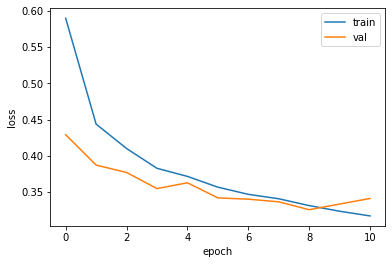

In [ ]:
# 훈련 손실과 검증 손실을 출력해서 확인
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
# 조기 종료로 얻은 모델을 사용해 검증 세트에 대한 성능 확인
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3257 - accuracy: 0.8820


[0.3256708085536957, 0.8820000290870667]